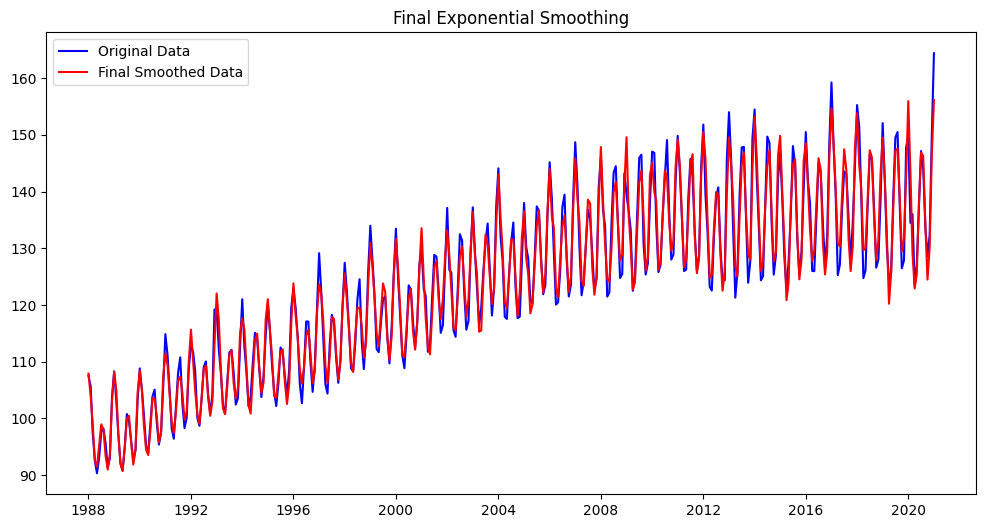

In [3]:
# ---------------------------------------
# Suppress warnings
# ---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------
# Imports
# ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ---------------------------------------
# Load Dataset (CORRECT COLUMN NAMES)
# ---------------------------------------
df = pd.read_csv(
    "ML471_S1_Datafile_Concept.csv",
    parse_dates=['DATE']
)

df.sort_values('DATE', inplace=True)
df.set_index('DATE', inplace=True)
df = df.asfreq('MS')   # Monthly frequency

# Target variable
y = df['Consumption']

# ---------------------------------------
# Final Exponential Smoothing Model
# ---------------------------------------
model = ExponentialSmoothing(
    y,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)

fitted_model = model.fit()

# Smoothed values
smoothed_series = fitted_model.fittedvalues

# ---------------------------------------
# Visualization (MATCHES SAMPLE)
# ---------------------------------------
plt.figure(figsize=(12, 6))

plt.plot(y.index, y.values,
         label='Original Data', color='blue')

plt.plot(smoothed_series.index, smoothed_series.values,
         label='Final Smoothed Data', color='red')

plt.title("Final Exponential Smoothing")
plt.legend()
plt.grid(False)

plt.show()
